**Group Members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
      <tr>
    <th>ALIEYA ZAWANIE BINTI A ZAINI</th>
    <th>A21EC0156</th>
  </tr>
     <tr>
    <th>IZZAT HAQEEMI BIN HAIRUDIN</th>
    <th>A21EC0033</th>
  </tr>
  <tr>
    <th>NG ZI XING</th>
    <th>A21EC0213</th>
  </tr>
  <tr>
    <th>MOHAMAD AZRI HADIF BIN MOHAMMAD RIZAL</th>
    <th>A21EC0054</th>
  </tr>

</table>

#1.Dataset Selection

There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

<table>
  <tr>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
      <tr>
    <th>step</th>
    <th>maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).</th>
  </tr>
     <tr>
    <th>type</th>
    <th>Transaction type</th>
  </tr>
  <tr>
    <th>amount</th>
    <th>amount of the transaction in local currency.</th>
  </tr>
  <tr>
    <th>nameOrig</th>
    <th>customer who started the transaction</th>
  </tr>
  <tr>
    <th>oldbalanceOrg</th>
    <th>initial balance before the transaction</th>
  </tr>
  <tr>
    <th>newbalanceOrig</th>
    <th>new balance after the transaction.</th>
  </tr>
  <tr>
    <th>nameDest</th>
    <th>customer who is the recipient of the transaction</th>
  </tr>
  <tr>
    <th>oldbalanceDest</th>
    <th>initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).</th>

> Indented block


  </tr>
  <tr>
    <th>newbalanceDest</th>
    <th>ew balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).</th>
  </tr>
  <tr>
    <th>isFraud</th>
    <th>This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.</th>
  </tr>
   <tr>
    <th>isFlaggedFraud</th>
    <th>The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.</th>
  </tr>

</table>

#2. Data Acquisition

The link for the dataset https://www.kaggle.com/datasets/ealaxi/paysim1

This dataset format is in CSV

#3. Setting Up the Environment

In this section code, the dataset is directly imported from kaggle where we did not need to download it into our device. In order to use this, we need to download our kaggle API where it is located in the kaggle account section. After running this code, it requires us to insert the kaggle.json which is the kaggle API into the Google Colab file.

In [ ]:
from google.colab import files
import os

files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ealaxi/paysim1

Saving kaggle.json to kaggle.json
 98% 174M/178M [00:02<00:00, 116MB/s] 
100% 178M/178M [00:02<00:00, 86.6MB/s]


In [ ]:
from zipfile import ZipFile

filepath = "/content/paysim1.zip"

# Check if the file exists before attempting to open it
if os.path.exists(filepath):
    with ZipFile(filepath, 'r') as zip:
        zip.printdir()
        zip.extractall("/content/")  # Extracting to /content/ directory

    # Remove the zip file after extraction
    os.remove(filepath)
else:
    print(f"The file {filepath} does not exist.")


File Name                                             Modified             Size
PS_20174392719_1491204439457_log.csv           2019-09-20 12:26:28    493534783


In [ ]:
pip install dask

In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd

ddf = dd.read_csv("PS_20174392719_1491204439457_log.csv")

 Display basic information about the DataFrame

In [ ]:
print(ddf.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


Display descriptive statistics of numeric columns

In [ ]:
statistics = ddf.describe().compute()
print(statistics)

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.380000e+02  1.553470e+04   0.000000e+00    0.000000e+00   
50%    2.300000e+02  8.105919e+04   1.621850e+04    0.000000e+00   
75%    3.270000e+02  2.203376e+05   1.452303e+05    1.864150e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

Check for missing values

In [ ]:
missing_values = ddf.isnull().sum().compute()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Display the first few rows of the DataFrame

In [ ]:
ddf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
memory_gb = ddf.memory_usage(deep=True).sum().compute() / (1024**3)

In [ ]:
import dask.dataframe as dd
import numpy as np

def reduce_mem_usage_ddf(ddf):
    start_mem = ddf.memory_usage(deep=True).sum().compute() / 1024**3
    print('Memory usage of Dask DataFrame is {:.2f} GB'.format(start_mem))

    for col in ddf.columns:
        col_type = ddf[col].dtype

        if col_type != 'object':
            c_min = ddf[col].min().compute()
            c_max = ddf[col].max().compute()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    ddf[col] = ddf[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    ddf[col] = ddf[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    ddf[col] = ddf[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    ddf[col] = ddf[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    ddf[col] = ddf[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    ddf[col] = ddf[col].astype(np.float32)
                else:
                    ddf[col] = ddf[col].astype(np.float64)
        else:
            ddf[col] = ddf[col].astype('category')

    end_mem = ddf.memory_usage(deep=True).sum().compute() / 1024**3
    print('Memory usage after optimization is: {:.2f} GB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return ddf

In [ ]:
ddf_new = reduce_mem_usage_ddf(ddf)

Memory usage of Dask DataFrame is 1.56 GB
Memory usage after optimization is: 1.16 GB
Decreased by 25.4%


In [ ]:
print(ddf.dtypes)

step                 int16
type              category
amount             float32
nameOrig          category
oldbalanceOrg      float32
newbalanceOrig     float32
nameDest          category
oldbalanceDest     float32
newbalanceDest     float32
isFraud               int8
isFlaggedFraud        int8
dtype: object


In [ ]:
ddf.info(memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Columns: 11 entries, step to isFlaggedFraud
dtypes: category(3), float32(5), int16(1), int8(2)
memory usage: 609.3 MB


Chunk

In [ ]:
import dask.dataframe as dd
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Specify the full path to the CSV file if it's not in the current directory
file_path = "PS_20174392719_1491204439457_log.csv"

# Check if the file exists
if os.path.exists(file_path):
    # Define the chunk size
    chunk_size = 100000

    # Define a function to process each chunk
    def process_chunk(chunk):
        # Calculate the total amount for each 'type'
        type_totals = chunk.groupby('type')['amount'].sum()
        print(type_totals)

        # Calculate min and max for the 'amount' variable
        min_amount = chunk['amount'].min()
        max_amount = chunk['amount'].max()
        print("Min Amount:", min_amount)
        print("Max Amount:", max_amount)

        # Sample: Print the first few rows of the chunk
        print(chunk.head())

    # Read the dataset in chunks using Dask
    ddf = dd.read_csv(file_path, blocksize=chunk_size)

    # Apply the process_chunk function to each chunk
    ddf.map_partitions(process_chunk).compute()
else:
    print(f"File not found: {file_path}")


Streaming output truncated to the last 5000 lines.
Max Amount: 6794779.67 
27.13
Max Amount: 5406924.56
   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   514   PAYMENT   10949.08     C6185360      155554.38       144605.29   
1   514   PAYMENT   58220.33  C1837338562       70705.00        12484.67   
2   514   CASH_IN   39477.56   C352458277        4735.00        44212.56   
3   514  CASH_OUT  438505.14   C767254439       44212.56            0.00   
4   514  CASH_OUT  504366.13  C1547118669       40372.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   M676465256            0.00            0.00        0               0  
1  M1722005888            0.00            0.00        0               0  
2  C1266747049        15631.77            0.00        0               0  
3  C2032434062      1108132.40      1546637.54        0               0  
4  C1355310453            0.00       504366.13        0              

#4. Data Preprocessing

In [ ]:
ddf.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
ddf.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Null-checking

In [ ]:
print("Missing values distribution: ")
print(ddf.isnull().mean())
print("")

Missing values distribution: 
Dask Series Structure:
npartitions=1
amount    float64
type          ...
dtype: float64
Dask Name: dataframe-mean, 7 graph layers



In [ ]:
print("Column datatypes: ")
print(ddf_new.dtypes)


Column datatypes: 
step                 int16
type              category
amount             float32
nameOrig          category
oldbalanceOrg      float32
newbalanceOrig     float32
nameDest          category
oldbalanceDest     float32
newbalanceDest     float32
isFraud               int8
isFlaggedFraud        int8
dtype: object


In [ ]:
ddf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#Dropping all duplicates column

In [ ]:
ddf = ddf.drop_duplicates( keep='last',inplace = True)


#5. Exploratory Data Analysis

Perform the following EDA tasks using big data tools:

a. Summary Statistics: Compute basic statistics such as mean, median, standard deviation, and quantiles for relevant numerical variables.

In [ ]:
pip install dask


In [ ]:
import dask.dataframe as dd

# Load the dataset with Dask
file_path = "PS_20174392719_1491204439457_log.csv"
ddf = dd.read_csv(file_path, assume_missing=True)

# Define relevant numerical variables
numerical_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

# Compute mean for each column
mean_stats = ddf[numerical_cols].mean().compute()
print("Mean:\n", mean_stats)

# Compute approximate median for each column
median_stats = ddf[numerical_cols].median_approximate().compute()
print("Approximate Median:\n", median_stats)

# Compute standard deviation for each column
std_stats = ddf[numerical_cols].std().compute()
print("Standard Deviation:\n", std_stats)

# Compute quantiles for each column
quantile_stats = ddf[numerical_cols].quantile([0.25, 0.5, 0.75]).compute()
print("Quantiles:\n", quantile_stats)


Mean:
 amount            1.798619e+05
oldbalanceOrg     8.338831e+05
newbalanceOrig    8.551137e+05
oldbalanceDest    1.100702e+06
newbalanceDest    1.224996e+06
dtype: float64
Approximate Median:
 amount             81059.190
oldbalanceOrg      16218.500
newbalanceOrig         0.000
oldbalanceDest    144140.755
newbalanceDest    232226.580
dtype: float64
Standard Deviation:
 amount            6.038582e+05
oldbalanceOrg     2.888243e+06
newbalanceOrig    2.924049e+06
oldbalanceDest    3.399180e+06
newbalanceDest    3.674129e+06
dtype: float64
Quantiles:
          amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0.25   15534.70         0.0000          0.0000          0.0000            0.00
0.50   81059.19     16218.5000          0.0000     144140.7550       232226.58
0.75  220337.57    145230.2925     186415.0275     973821.7625      1177091.92


b. Data Visualization: Create visualizations like histograms, box plots, scatter plots, and heatmaps to understand data distributions, correlations, and outliers.

In [ ]:
pip install dask matplotlib seaborn


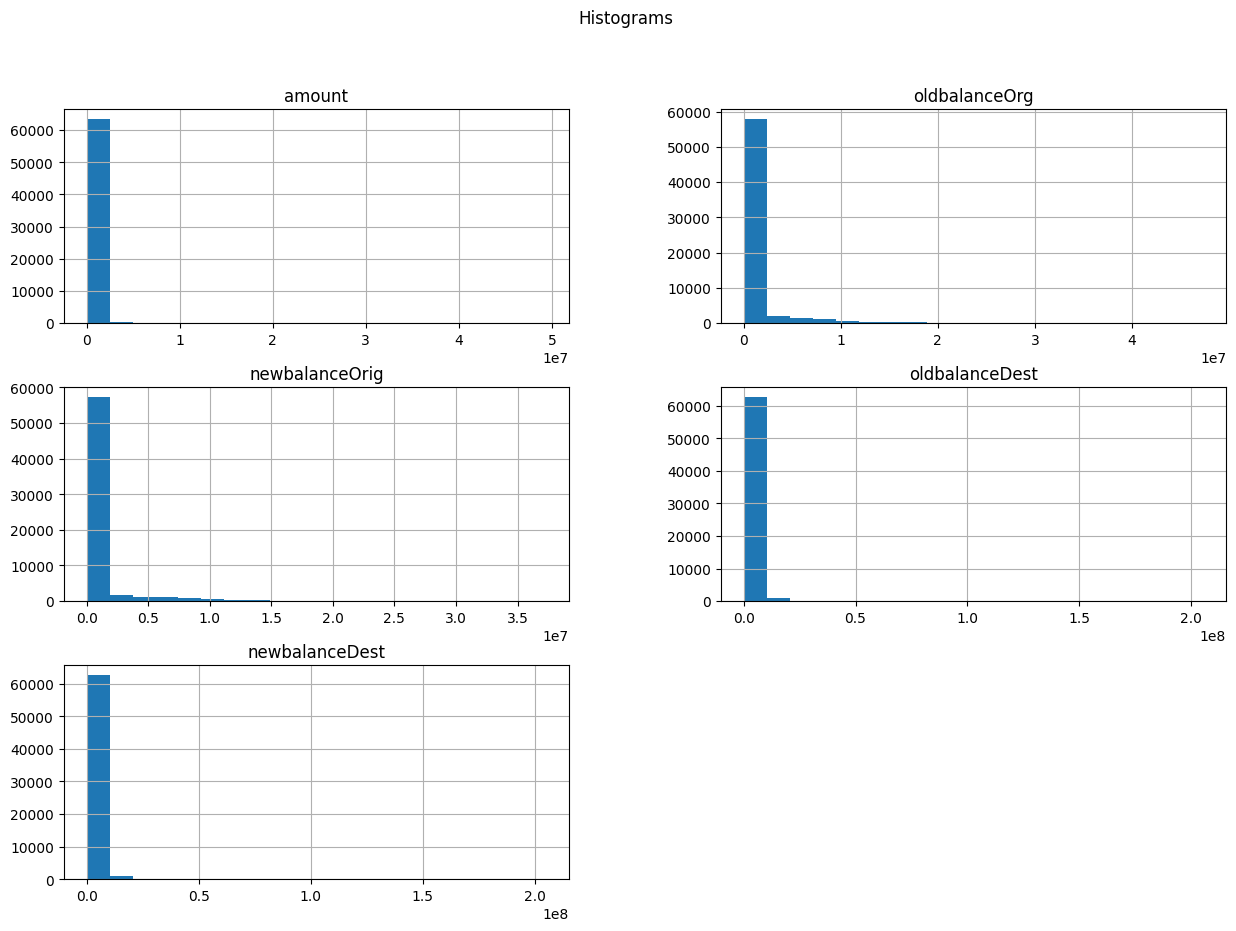

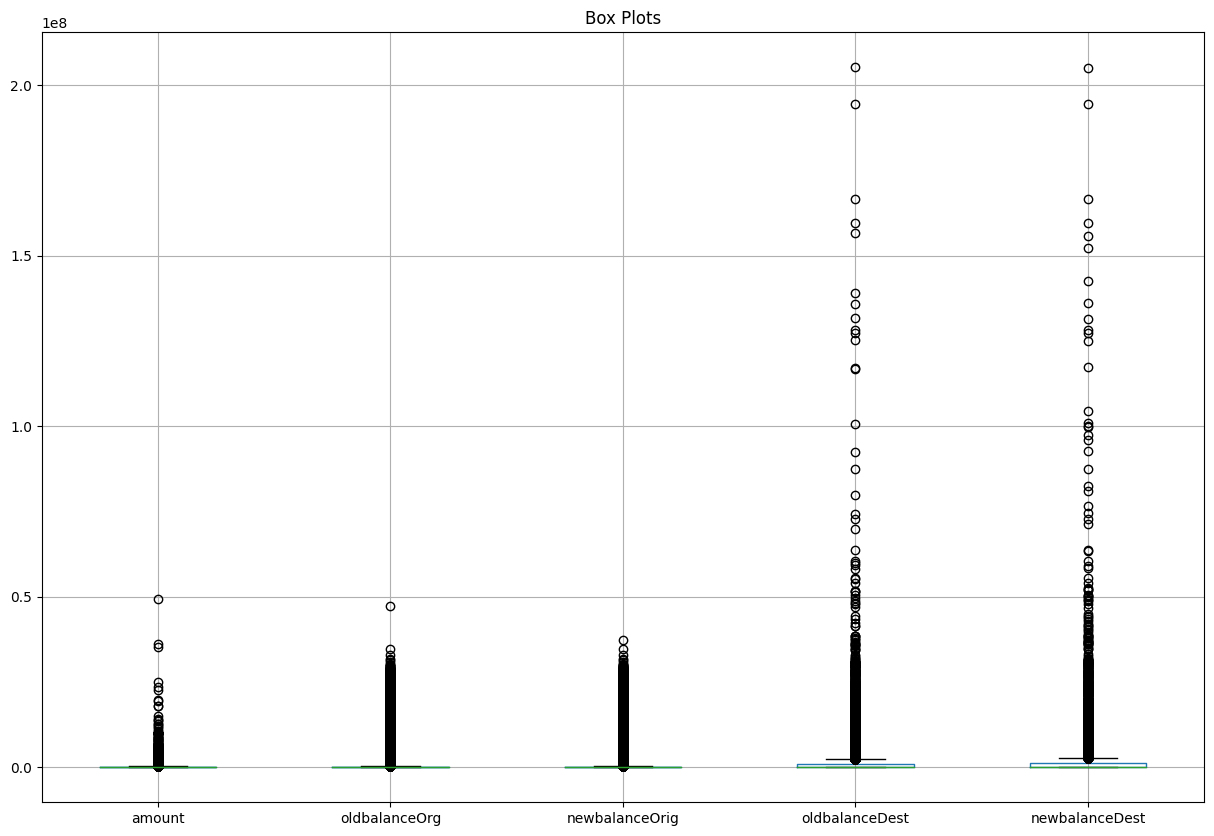

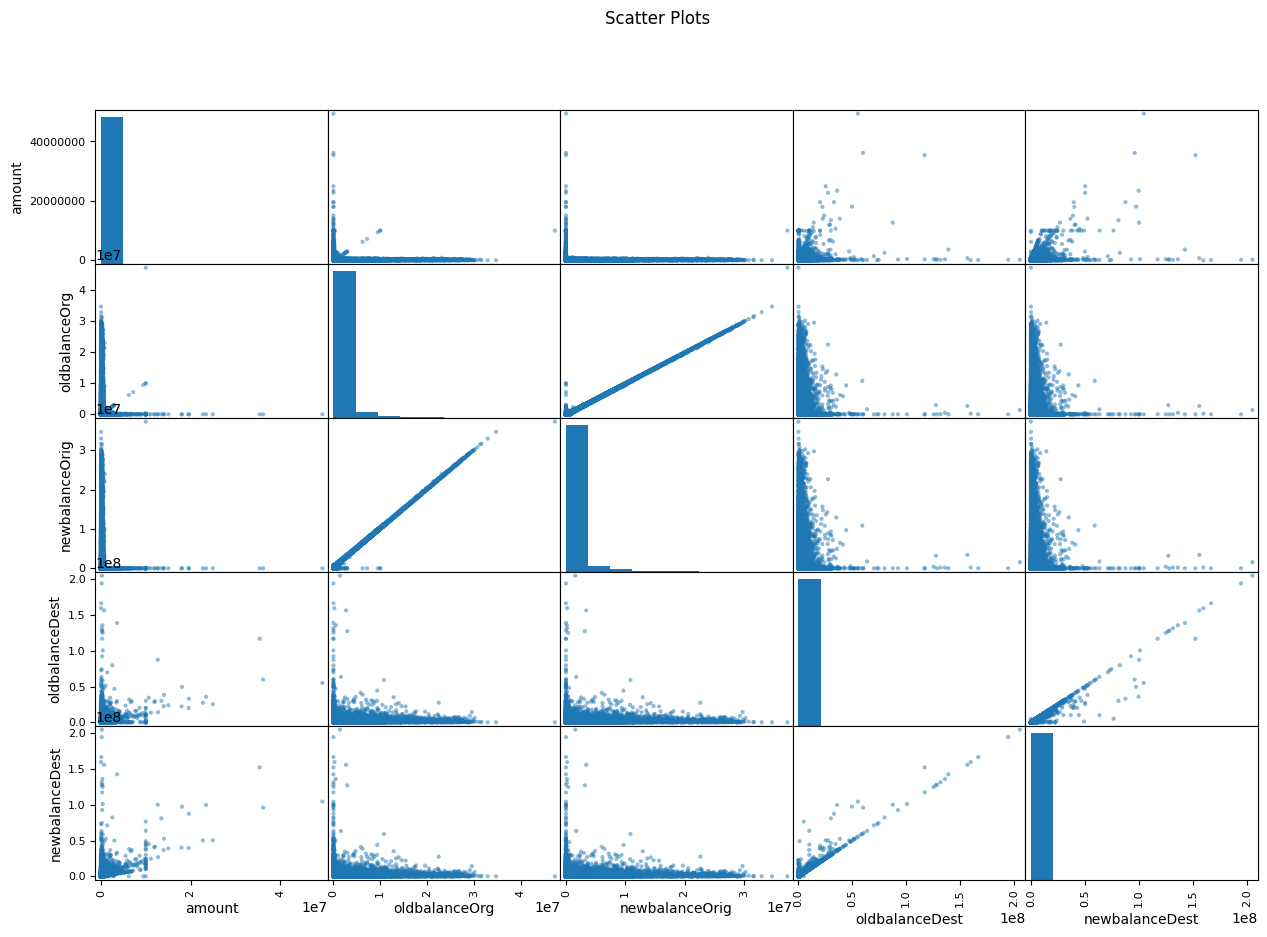

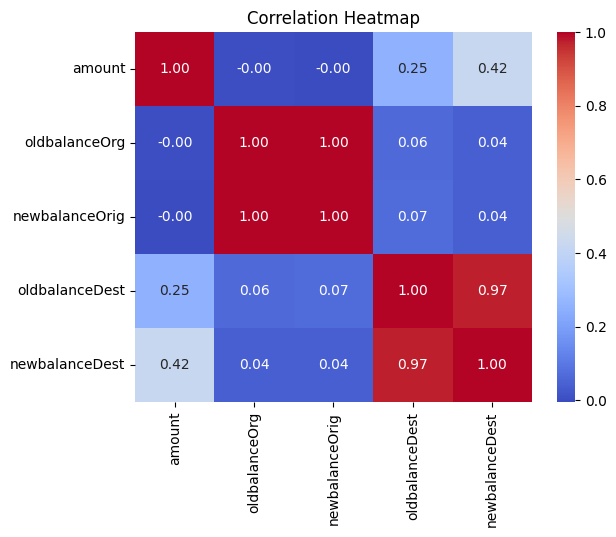

In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Load the dataset with Dask
file_path = "PS_20174392719_1491204439457_log.csv"
ddf = dd.read_csv(file_path)

# Convert a portion of the data to Pandas for local visualization
pandas_ddf = ddf.sample(frac=0.01, random_state=42).compute()

# Data Visualization
# Histograms
pandas_ddf[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms")
plt.show()

# Box plots
pandas_ddf[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]].boxplot(figsize=(15, 10))
plt.title("Box Plots")
plt.show()

# Scatter plots (for correlation)
scatter_matrix(pandas_ddf[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]], figsize=(15, 10))
plt.suptitle("Scatter Plots")
plt.show()

# Heatmap (for correlation)
corr_matrix = pandas_ddf[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


c. Data Exploration: Explore the dataset's structure and identify any patterns, trends, or anomalies. Pay attention to variables' distributions, relationships, and potential insights.

Number of rows: 6362620
Columns: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.380000e+02  1.553470e+04   0.000000e+00    0.000000e+00   
50%    2.300000e+02  8.105919e+04   1.621850e+04    0.000000e+00   
75%    3.270000e+02  2.203376e+05   1.452303e+05    1.864150e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+0

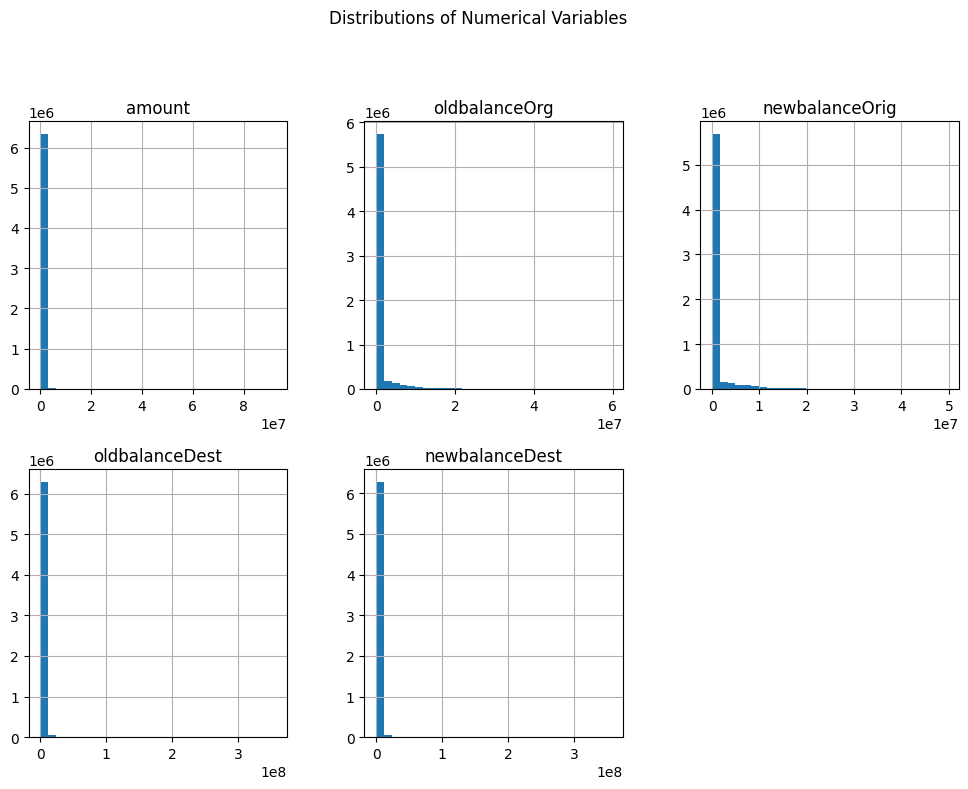

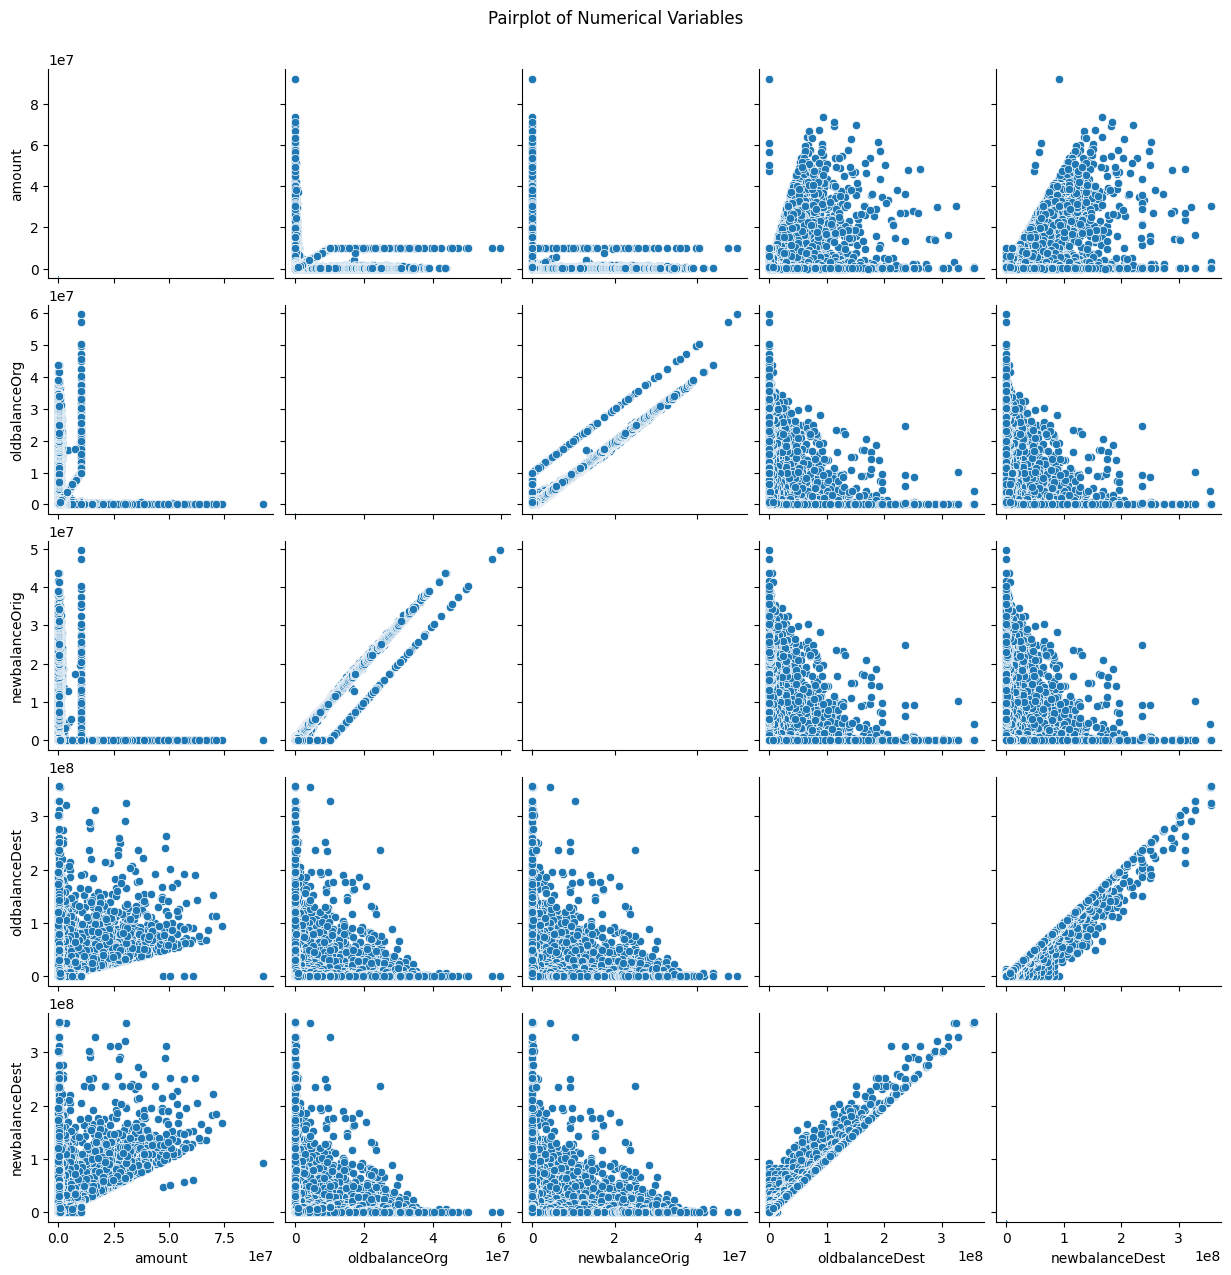

Number of fraud transactions: 8213


In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with Dask
file_path = "PS_20174392719_1491204439457_log.csv"
ddf = dd.read_csv(file_path, assume_missing=True)

# Display basic information about the dataset
print("Number of rows:", len(ddf))
print("Columns:", ddf.columns)

# Summary statistics for numerical columns
summary_stats = ddf.describe().compute()
print(summary_stats)

# Explore distributions using histograms
numerical_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
ddf[numerical_cols].compute().hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Distributions of Numerical Variables", y=1.02)
plt.show()

# Explore relationships using scatter plots
sns.pairplot(ddf[numerical_cols].compute())
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# Explore potential anomalies or patterns
fraud_transactions = ddf[ddf['isFraud'] == 1].compute()
print("Number of fraud transactions:", len(fraud_transactions))


d. Feature Engineering: If applicable, create new
features or transform existing ones to better support your analysis.

In [ ]:
import pandas as pd
import dask.dataframe as dd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "PS_20174392719_1491204439457_log.csv"
ddf = dd.read_csv(file_path, assume_missing=True)
X = ddf.copy()
y = X.pop("isFraud")

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_columns]

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_numeric.compute(), y.compute())
print(mi_scores[::3])


step              0.010864
newbalanceOrig    0.000668
isFlaggedFraud    0.000016
Name: MI Scores, dtype: float64


#Feature Engineering Analysis <br>

The code is done by taking the isFraud as the target variable for Mutual Information. The variable taken to prove the relation with "isFraud" is only column with the datatype "int64" or "float64" as the dtype for isFraud is in interger. Therefore, we only have 3 column that have the same dtype. The first thing that is done is by measuring the MI score to see which one is the highest among them all.

Then, we can proceed in doing Feature Generation , Further MI analysis and so on. But in the dataset that we use , the MI score are okay but looking back the highest MI score which is "step" the distinct value of it is only "1". Therefore, it might not be provding diverse information for disinguishing between different instances of the target variable. Not to mention, that the "isFraud" column only have the value "0" and "1". So in conclusion, doing FE in a numerical manner using this dataset might not be the best choice. By doing a categorical FE might produce better result

#6. Documentation

Document your analysis, including the tools, libraries, and scripts used. Explain the key findings and insights you derived from the EDA.

This report presents the exploratory data analysis (EDA) performed on the fraud detection dataset using Dask. The goal of this analysis is to gain insights into the structure of the data, understand the patterns and relationships within the dataset, and identify potential features for fraud detection.

###Tools and Libraries Used



1.   Dask: Used for distributed computing and parallel processing, allowing for efficient handling of large datasets.
2.  Seaborn: A statistical data visualization library.
3.  Matplotlib: A plotting library for Python.








###Key Findings and Insights

1.  Transaction Types:
*   The dataset contains various transaction types, including CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

<br><br>

2.   Fraud Distribution:
* Fraudulent transactions are relatively rare, as indicated by the low mean of the isFraud column (approximately 0.13%).
* Very few transactions are flagged as fraud, as suggested by the low mean of the isFlaggedFraud column (approximately 0.00000251).

<br><br>


3.   Feature Engineering:
* Using mutual_info_classic for numerical values in this assignment may not be suitable.
* nitially selecting "isFraud" as the target variable for MI aims to identify columns influencing fraud detection. However, the issue arises from "isFraud" having only one unique value (0), indicating no fraud.
* Due to the target variable having a single value (0), applying feature engineering using mutual_info_classic may lead to unreliable results.
* Given the limitation of unique values in "isFraud," alternative analysis methods are more appropriate to understand the relationships between features and the target.
* While it's common to consider data type consistency for feature engineering, the key is to ensure that the engineered features contribute meaningfully to understanding relationships within the data.
* Due to the constraints posed by the target variable's unique values, there is a need to reassess the suitability of the chosen feature engineering method and explore alternatives.
* Considering other analysis methods that can provide meaningful insights, especially in the absence of diverse values in the target variable.

<br><br>

4.  Balance Changes:
*  Analyzed balance changes for origin and destination accounts.
*   Negative values indicate a decrease in balance, reflecting outgoing transactions.






